# NDVI Difference

Script to calculate the difference between NDVIs

<b>Imports

In [1]:
from image_landsat_8 import image_landsat_8
import matplotlib.pyplot as plt
from osgeo import gdal, ogr
import os, sys

<b>Define Paths

In [4]:
file_path_grade = "../data/grade_221_067/221_067_grade.shp"
file_path_tar_before = "../data/LC08_L1TP_221067_20170910_20170927_01_T1.tar.gz"
file_path_tar_after = "../data/LC08_L1TP_221067_20170926_20171013_01_T1.tar.gz"

file_path_out_before = "../data/NDVI/NDVI_221067_20170910.TIF"
file_path_out_after = "../data/NDVI/NDVI_221067_20170926.TIF"

file_path_out_before_cut = "../data/NDVI/CUT_NDVI_221067_20170910.TIF"
file_path_out_after_cut = "../data/NDVI/CUT_NDVI_221067_20170926.TIF"

file_path_out_dif_ndvi = "../data/NDVI/diferenca_NDVI.TIF"

landsat_images_before = image_landsat_8(file_path_tar_before, file_path_grade)
landsat_images_after = image_landsat_8(file_path_tar_after, file_path_grade)

Descompactando...
Cortando os arquivos..
Descompactando...
Cortando os arquivos..


<b>Read Bands

In [5]:
band_red_before = landsat_images_before.get_band_red()
band_red_before = landsat_images_before.calculo_reflectancia(band_red_before, 58.79152871)
band_nir_before = landsat_images_before.get_band_nir()
band_nir_before = landsat_images_before.calculo_reflectancia(band_nir_before, 58.79152871)

band_red_after = landsat_images_after.get_band_red()
band_red_after = landsat_images_after.calculo_reflectancia(band_red_after, 62.61676121)
band_nir_after = landsat_images_after.get_band_nir()
band_nir_after = landsat_images_after.calculo_reflectancia(band_nir_after, 62.61676121)

<b>Calculate NDVI

In [6]:
band_ndvi_before = landsat_images_before.ndvi(band_red_before, band_nir_before)
band_ndvi_after = landsat_images_after.ndvi(band_red_after, band_nir_after)

<b>Save

In [7]:
dataset_before = gdal.Open(landsat_images_before.get_directory_tmp() + "B5.TIF")
dataset_after = gdal.Open(landsat_images_after.get_directory_tmp() + "B5.TIF")

landsat_images_before.to_img(band_ndvi_before, file_path_out_before, dataset_before.GetGeoTransform(), dataset_before.GetProjectionRef())
landsat_images_after.to_img(band_ndvi_after, file_path_out_after, dataset_after.GetGeoTransform(), dataset_after.GetProjectionRef())

Salvando arquivos...
Salvando arquivos...


<b>Cut

In [9]:
landsat_images_before.cut(file_path_out_before, file_path_grade, file_path_out_before_cut)
landsat_images_after.cut(file_path_out_after, file_path_grade, file_path_out_after_cut)

band_ndvi_before_cut = landsat_images_before.get_band(file_path_out_before_cut)
band_ndvi_after_cut = landsat_images_after.get_band(file_path_out_after_cut)

<b>Shape

In [10]:
print(band_ndvi_before_cut.shape)
print(band_ndvi_after_cut.shape)

(6103, 6594)
(6103, 6594)


<b>Calculate Difference

In [12]:
dataset = gdal.Open(file_path_out_before_cut)

dif_ndvi = (band_ndvi_after_cut - band_ndvi_before_cut)

landsat_images_after.to_img(dif_ndvi, file_path_out_dif_ndvi, dataset.GetGeoTransform(), dataset.GetProjectionRef())

rel_ndvi = dif_ndvi / abs(band_ndvi_before_cut)

landsat_images_after.to_img(rel_ndvi, "../data/NDVI/ndvi_dif_relativa.TIF", dataset.GetGeoTransform(), dataset.GetProjectionRef())


Salvando arquivos...
Salvando arquivos...


<b> Plot

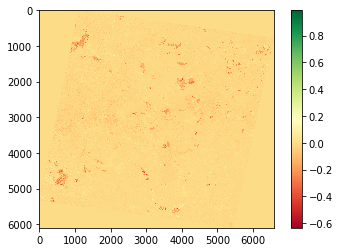

In [17]:
image_landsat_8.plot_image(image_landsat_8, dif_ndvi)